In [1]:
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel(r"Clean3d_master_dataset.xlsx")

In [52]:
data.head()

,Time (s),Material,Alpha,Part,Node,X,Y,Z,Temperature,T_left,T_right,T_bottom,T_top,T_back,T_front,x/L,y/L,z/L
0,0.01,Copper,0.000111,PART-1-2,1,0.02,0.010,0.01,100.0,300,100,300,100,300,100,1.0,1.0,1.0
1,0.01,Copper,0.000111,PART-1-2,2,0.02,0.008,0.01,100.0,300,100,300,100,300,100,1.0,0.8,1.0
2,0.01,Copper,0.000111,PART-1-2,3,0.02,0.006,0.01,100.0,300,100,300,100,300,100,1.0,0.6,1.0
3,0.01,Copper,0.000111,PART-1-2,4,0.02,0.004,0.01,100.0,300,100,300,100,300,100,1.0,0.4,1.0
4,0.01,Copper,0.000111,PART-1-2,5,0.02,0.002,0.01,100.0,300,100,300,100,300,100,1.0,0.2,1.0


In [53]:
data.describe()

,Time (s),Alpha,Node,X,Y,Z,Temperature,T_left,T_right,T_bottom,T_top,T_back,T_front,x/L,y/L,z/L
count,310392.000000,310392.000000,310392.000000,310392.000000,310392.000000,310392.000000,3.103920e+05,310392.000000,310392.000000,310392.000000,310392.000000,310392.000000,310392.000000,310392.000000,310392.000000,310392.000000
mean,0.756263,0.000050,198.500000,0.010000,0.005000,0.005000,2.123130e+02,450.034795,100.069589,400.069589,100.139179,333.263744,133.402923,0.500000,0.500000,0.500000
std,1.763122,0.000041,123.401644,0.006831,0.003416,0.003416,1.469663e+02,111.896899,81.607134,81.692364,81.649671,47.115867,47.165074,0.341566,0.341566,0.341566
min,0.010000,0.000004,1.000000,0.000000,0.000000,0.000000,-1.757920e-35,300.000000,0.000000,300.000000,0.000000,300.000000,100.000000,0.000000,0.000000,0.000000
25%,0.050000,0.000004,90.750000,0.004000,0.002000,0.002000,1.000000e+02,300.000000,0.000000,300.000000,0.000000,300.000000,100.000000,0.200000,0.200000,0.200000
50%,0.120000,0.000064,198.500000,0.010000,0.005000,0.005000,2.000000e+02,500.000000,100.000000,400.000000,100.000000,300.000000,100.000000,0.500000,0.500000,0.500000
75%,0.500000,0.000111,306.250000,0.016000,0.008000,0.008000,3.000000e+02,600.000000,200.000000,500.000000,200.000000,400.000000,200.000000,0.800000,0.800000,0.800000
max,10.000000,0.000111,396.000000,0.020000,0.010000,0.010000,6.000000e+02,600.000000,200.000000,500.000000,200.000000,400.000000,200.000000,1.000000,1.000000,1.000000


In [54]:
indices = data[ data['x/L'] == 0.1].index
newdata = data.drop(indices, axis=0)
newdata.shape

(310392, 18)

In [55]:
indices = data[ data['x/L'] == 0.3].index
newdata = newdata.drop(indices, axis=0)
newdata.shape

(310392, 18)

In [56]:
indices = data[ data['x/L'] == 0.5].index
newdata = newdata.drop(indices, axis=0)
newdata.shape

(310392, 18)

In [57]:
indices = data[ data['x/L'] == 0.7].index
newdata = newdata.drop(indices, axis=0)
newdata.shape

(310392, 18)

In [58]:
indices = data[ data['X'] == 0.018].index
newdata = newdata.drop(indices, axis=0)
newdata.shape

(310392, 18)

In [59]:
data = newdata

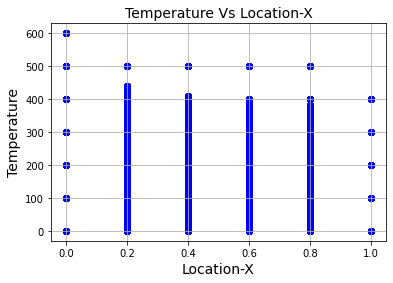

In [60]:
plt.scatter(data['x/L'], data['Temperature'], color='blue')
plt.title('Temperature Vs Location-X', fontsize=14)
plt.xlabel('Location-X', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

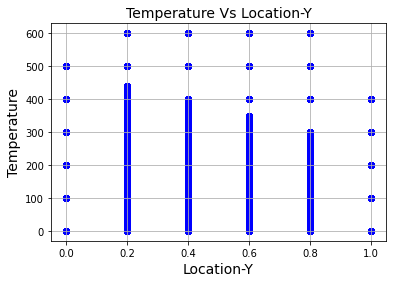

In [61]:
plt.scatter(data['y/L'], data['Temperature'], color='blue')
plt.title('Temperature Vs Location-Y', fontsize=14)
plt.xlabel('Location-Y', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

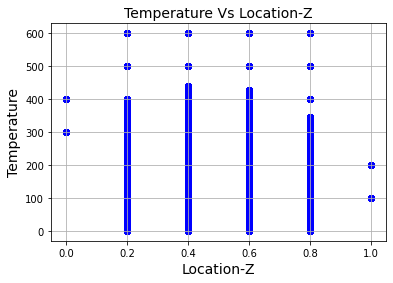

In [62]:
plt.scatter(data['z/L'], data['Temperature'], color='blue')
plt.title('Temperature Vs Location-Z', fontsize=14)
plt.xlabel('Location-Z', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

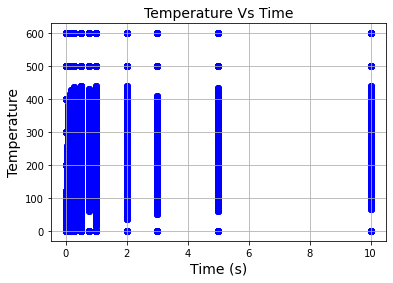

In [63]:
plt.scatter(data['Time (s)'], data['Temperature'], color='blue')
plt.title('Temperature Vs Time', fontsize=14)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

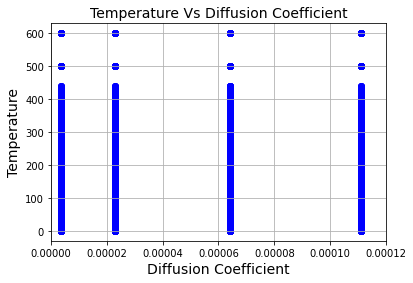

In [64]:
plt.scatter(data['Alpha'], data['Temperature'], color='blue')
plt.title('Temperature Vs Diffusion Coefficient', fontsize=14)
plt.xlabel('Diffusion Coefficient', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.xlim([0, 1.2E-4])
plt.show()

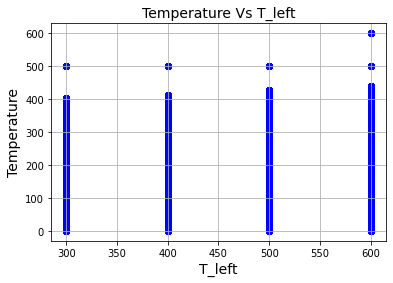

In [65]:
plt.scatter(data['T_left'], data['Temperature'], color='blue')
plt.title('Temperature Vs T_left', fontsize=14)
plt.xlabel('T_left', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

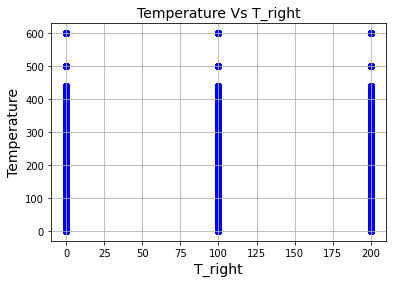

In [66]:
plt.scatter(data['T_right'], data['Temperature'], color='blue')
plt.title('Temperature Vs T_right', fontsize=14)
plt.xlabel('T_right', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

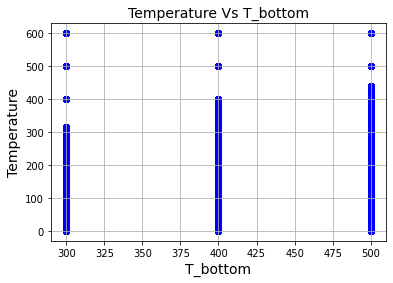

In [67]:
plt.scatter(data['T_bottom'], data['Temperature'], color='blue')
plt.title('Temperature Vs T_bottom', fontsize=14)
plt.xlabel('T_bottom', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

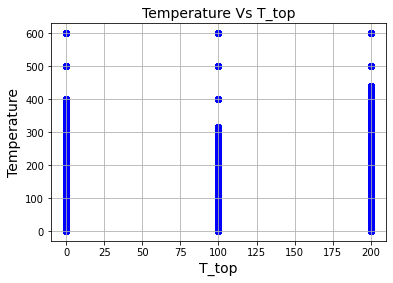

In [68]:
plt.scatter(data['T_top'], data['Temperature'], color='blue')
plt.title('Temperature Vs T_top', fontsize=14)
plt.xlabel('T_top', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

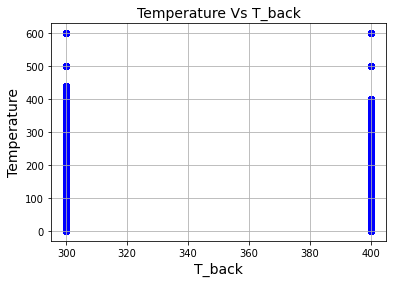

In [69]:
plt.scatter(data['T_back'], data['Temperature'], color='blue')
plt.title('Temperature Vs T_back', fontsize=14)
plt.xlabel('T_back', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

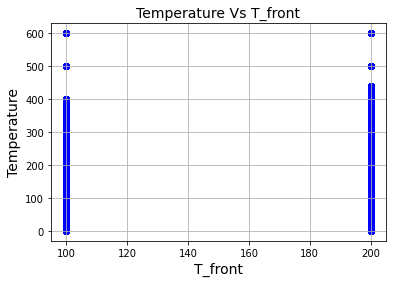

In [70]:
plt.scatter(data['T_front'], data['Temperature'], color='blue')
plt.title('Temperature Vs T_front', fontsize=14)
plt.xlabel('T_front', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

In [71]:
#seperating independent and dependent variables, Temperature is the only dependent variable in our case
x = data[['T_left', 'T_right', 'T_bottom', 'T_top', 'T_back', 'T_front', 'Time (s)', 'Alpha', 'x/L', 'y/L', 'z/L']]
y = data['Temperature']
x.shape, y.shape

((310392, 11), (310392,))

In [72]:
import time
#storing starting time
begin = time.time()

#Creating Training-Testing data from the new data frame

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y , test_size = 0.25, random_state = 100)

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, max_depth= 12, random_state=100, oob_score = True)

In [74]:
rf.fit(train_x, train_y)

RandomForestRegressor(max_depth=12, n_estimators=1000, oob_score=True,
                      random_state=100)

In [75]:
y_pred = rf.predict(test_x)
print (y_pred)

[1.00000000e+02 5.42565117e-35 2.09949638e+02 ... 2.95893751e+02
 4.00000000e+02 1.28591683e+02]


In [76]:
from sklearn.metrics import r2_score
r2_score(test_y, y_pred)

0.980172123407949

In [77]:
#storing end time
time.sleep(1)
end = time.time()

In [78]:
#Calculating runtime
print ("Total runtime of Random Forest program (in seconds) is", end - begin)

Total runtime of Random Forest program (in seconds) is 159.6921079158783


In [79]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 8.920822556472674
Mean Squared Error: 424.29739208716126
Root Mean Squared Error: 20.59848033441208


In [80]:
importances = pd.DataFrame({'feature':train_x.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')


In [81]:
importances.head()

,importance
feature,
z/L,0.323
y/L,0.249
x/L,0.224
Time (s),0.047
T_left,0.033


<AxesSubplot:xlabel='feature'>

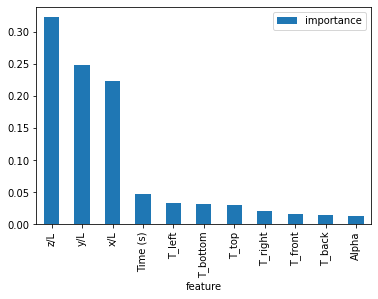

In [82]:
importances.plot.bar()

In [83]:
rf.oob_score_

0.9804338846100279

In [84]:
df=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
df

,Actual,Predicted
18132,1.000000e+02,1.000000e+02
235249,7.766960e-35,5.425651e-35
275916,2.000000e+02,2.099496e+02
509164,3.091750e+02,2.181491e+02
446466,3.000000e+02,3.000000e+02
...,...,...
79449,4.000000e+02,4.000000e+02
409949,5.000000e+02,5.000000e+02
199684,2.969400e+02,2.958938e+02
85119,4.000000e+02,4.000000e+02


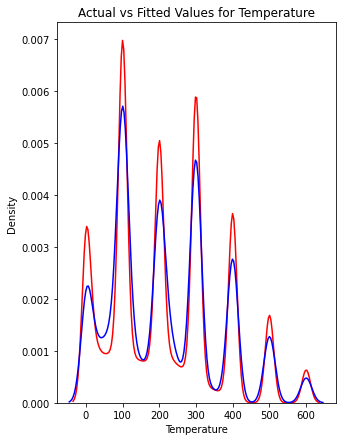

In [85]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Temperature')


plt.show()
plt.close()

In [39]:
#x_test = np.array([0.8,0.33,8e-6,400,150])
#x_test = x_test.reshape((1,-1))
#y_pred = rf.predict(x_test)

In [40]:
print ("The predicted temperature for the given parameters is", y_pred[0])

The predicted temperature for the given parameters is 100.0


In [41]:
# pip install yellowbrick

In [42]:
#from yellowbrick.datasets import load_energy
# from yellowbrick.model_selection import validation_curve

In [43]:

# x = data[['T_left', 'T_right', 'T_bottom', 'T_top', 'T_back', 'T_front', 'Time (s)', 'Alpha', 'x/L', 'y/L', 'z/L']]
# y = data['Temperature']

In [44]:
# parameter_range = np.arange(1, 15, 1)

In [45]:
# begin = time.time()
# viz = validation_curve(RandomForestRegressor(), x, y, param_name = "max_depth", param_range = parameter_range, cv = 10, scoring = "r2")

In [46]:
#viz.fit(x,y)
# viz.show()
# print("Validation curve time taken: ", time.time() - begin)

In [47]:
# print("Time: ", time.time() - begin)

In [48]:
# parameter_range = np.arange(1, 8000, 1000)
# begin = time.time()
# viz = validation_curve(RandomForestRegressor(), x, y, param_name = "n_estimators", param_range = parameter_range, cv = 5, scoring = "r2")
# print("N Estimators time taken: ", time.time() - begin)

In [49]:
# from yellowbrick.model_selection import learning_curve

# x = data[['T_left', 'T_right', 'T_bottom', 'T_top', 'Time (s)', 'Alpha', 'x/L', 'y/L']]
# y = data['Temperature']

In [50]:
# print(learning_curve(RandomForestRegressor(), x, y, cv=10, scoring='r2'))

In [51]:
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import train_test_split

# from yellowbrick.regressor import PredictionError

# # Load a regression dataset
# x = data[['T_left', 'T_right', 'T_bottom', 'T_top', 'Time (s)', 'Alpha', 'x/L', 'y/L']]
# y = data['Temperature']

# # Instantiate the linear model and visualizer
# model = Lasso()
# visualizer = PredictionError(model)

# visualizer.fit(train_x, train_y)  # Fit the training data to the visualizer
# visualizer.score(test_x, test_y)  # Evaluate the model on the test data
# visualizer.show()                 # Finalize and render the figure